Practical Statistics for Data Science - Chapter 1

# Chapeter 1. Exploratory Data Analysis

###  A major challenge of data sciencew is to harness this torrebt of raw data into actionable information.

### 2 basic types of structured data: numeric (contunuous or discrete) & categorical (binary or orinal)
- R or Python use these data types to improve computational perfprmance. 
- data type dertermines how software will handle computationa for that variables.

## Estimates of location
#### Mean \ Weighted Mean \ Median \ Percentile \ Weighted median \ Trimmed mean \ Robust \ Outlier

### Example: location estimates of population and murder rates

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
## pip install wquantiles
import wquantiles
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
state = pd.read_csv('Data/state.csv')
state['Population'].mean()

6162876.3

In [20]:
## trim the upper and lower 10% of the data and calculate the mean
trim_mean(state['Population'], 0.1)

4783697.125

In [21]:
state['Population'].mean()

6162876.3

In [23]:
##weighted mean is available with Numpy
np.average(state['Murder.Rate'], weights = state['Population'])

4.445833981123393

In [32]:
##weighted median: use package wquantile
wquantiles.median(state['Murder.Rate'],weights = state['Population'])

4.4

## Estimated of Variability
#### Deviation\ Variance \ Standard deviation \ Mean absolute deviation \ Range \ Order statistics(Ranks) \ Percentile \ Interquartile range (IQR)(25%-75%)

In [33]:
## standard deviation
state['Population'].std()

6848235.347401142

In [34]:
## IQR
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [45]:
## robust MAD the median absolute deviation from the median
sm.robust.mad(state['Population'])

3849876.1459979336

## Data Distribution
- Percentiles and Boxplots

In [48]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(millions)')

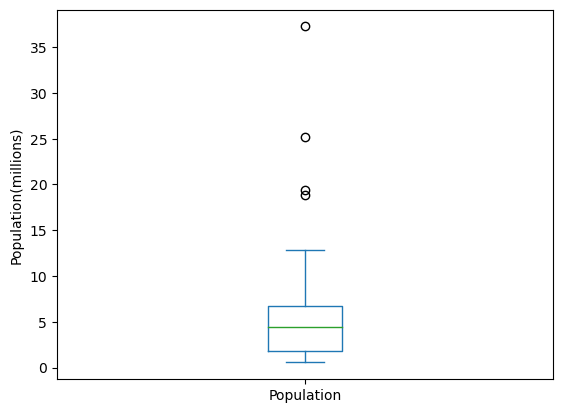

In [50]:
## pandas provides a number of basic exploratory plots for data frame; one of them is boxplots:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population(millions)')

- frequency tables and histograms

In [51]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0, 0.5, 'Population(millions)')

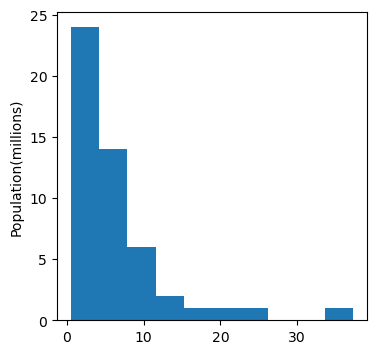

In [52]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_ylabel('Population(millions)')

- Density Plots and Estimates

Text(0.5, 0, 'Murder.Rate(per 100,000)')

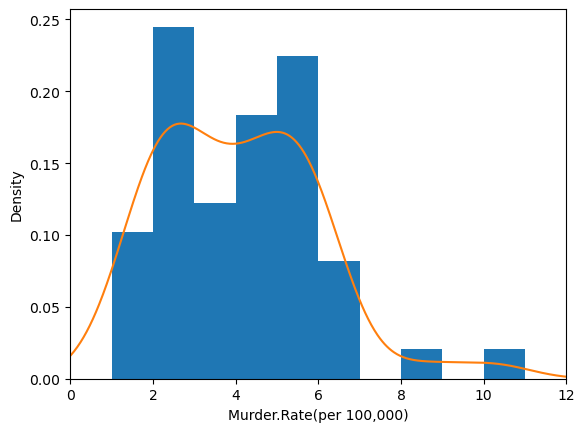

In [54]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder.Rate(per 100,000)')

## Binary and Categorical Data
#### Mode\ Expected value \ Bar charts \ Pie charts

In [79]:
# Table 1-6
dfw = pd.read_csv('Data/dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


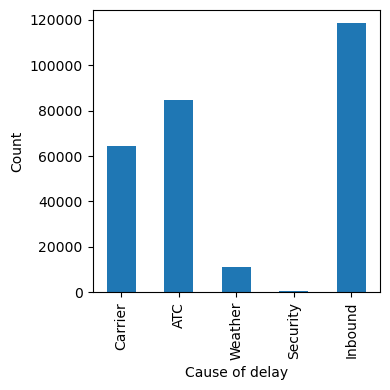

In [81]:
## pandas support bar charts for data frame

ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation
- Correlation coefficient: 
A metric that measures the extent to which numeric variables are associated with one another (ranges from -1 to 1)
- Correlation matrix: 
A table where the variables are shown on both rows and colums, and the cell values are the correlations between the variables
- Scatterplot:
A plot in which the x-axis is the value of one variable, and the y axis the value if another

In [90]:
## the visualization of correlation matrices using heatmaps using seaborn.heatmap 
sp500_sym = pd.read_csv('Data\SP500_SECTORS.CSV')
sp500_px = pd.read_csv('Data\SP500_DATA.CSV.gz', index_col=0)

# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


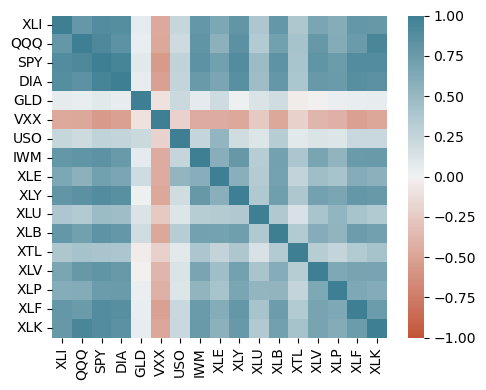

In [92]:
## heatmap
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

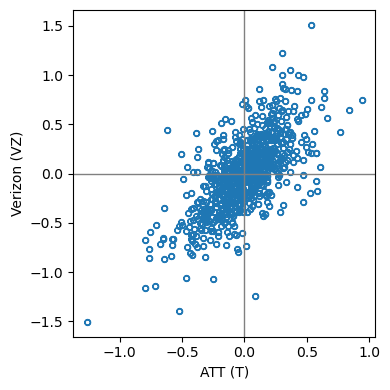

In [93]:
## the scatterplots can be generated in Python using the pandas scatter method
## marker='$\u25EF$' 指定了散点的标记，这里使用了Unicode字符来表示一个圆圈。
## ax.axhline(0, color='grey', lw=1) 在 y=0 处绘制一条灰色的水平线。ax.axvline(0, color='grey', lw=1) 在 x=0 处绘制一条灰色的垂直线。
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

## Exploring two or more Varables

In [97]:
kc_tax = pd.read_csv('Data/KC_TAX.CSV.GZ')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


### Hexagonal binning and Contours (Plotting Numeric vs Numeric Data)
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

Text(0, 0.5, 'Tax Assessed Value')

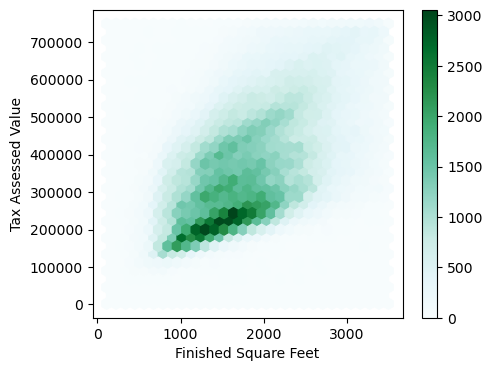

In [98]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

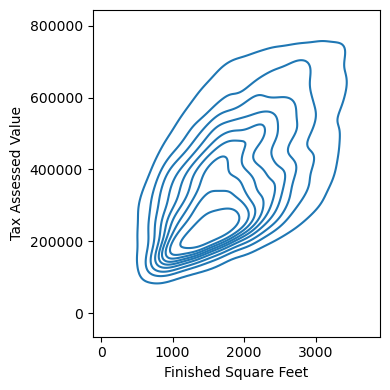

In [103]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Two Categorical Variables

In [107]:
## contingency table (a table of counts by categories) between the gardes and the outcome of the loan
lc_loans = pd.read_csv('Data/LC_LOANS.CSV')
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [106]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


### Categorical and Numeric Data

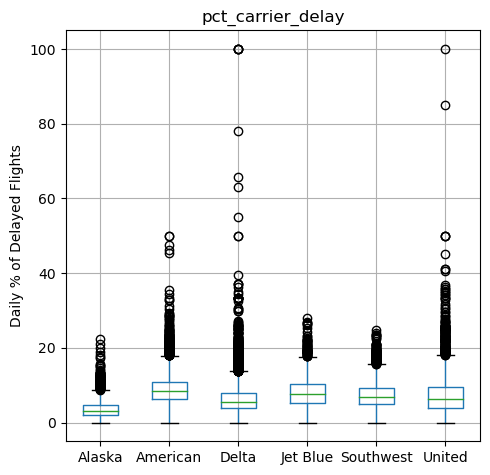

In [108]:
##Pandas boxplots of a column can be grouped by a different column.
airline_stats = pd.read_csv('Data/AIRLINE_STATS.CSV')
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

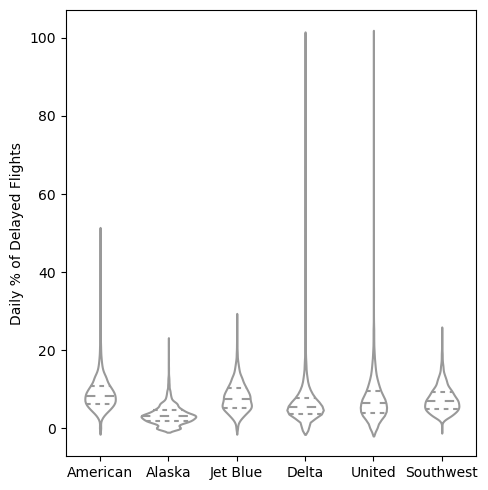

In [109]:
## Pandas also supports a variation of boxplots called violinplot.
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### Visualizing Multiple Variables

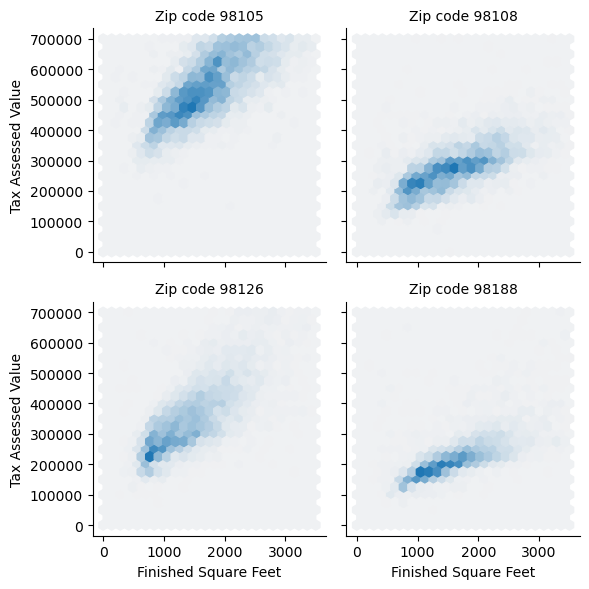

In [110]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()